# Data

## Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import pandas as pd
import time
import seaborn as sns
from sklearn import metrics
from sklearn.decomposition import PCA
from collections import Counter
from imblearn.over_sampling import SMOTE

In [3]:
path = '../datasets/diabetes_data_initial.csv'
data = pd.read_csv(path)

## Age

In [4]:
replaceDict = {'[0-10)' : 5,
'[10-20)' : 15,
'[20-30)' : 25,
'[30-40)' : 35,
'[40-50)' : 45,
'[50-60)' : 55,
'[60-70)' : 65,
'[70-80)' : 75,
'[80-90)' : 85,
'[90-100)' : 95}

data['age'] = data['age'].apply(lambda x : replaceDict[x])


## Patient History

In [5]:
data['prev_visits'] = data.groupby('patient_nbr').encounter_id.transform(lambda x: range(len(x)))

## Medical Specialty

In [6]:
high_frequency = ['InternalMedicine', 'Family/GeneralPractice', 'Cardiology', 'Surgery-General', 'Orthopedics', 'Orthopedics-Reconstructive', 'Emergency/Trauma', 'Urology','ObstetricsandGynecology','Psychiatry','Pulmonology ','Nephrology','Radiologist']
low_frequency = ['Surgery-PlasticwithinHeadandNeck','Psychiatry-Addictive','Proctology','Dermatology','SportsMedicine','Speech','Perinatology', 'Neurophysiology','Resident','Pediatrics-Hematology-Oncology','Pediatrics-EmergencyMedicine','Dentistry','DCPTEAM','Psychiatry-Child/Adolescent', 'Pediatrics-Pulmonology','Surgery-Pediatric','AllergyandImmunology','Pediatrics-Neurology','Anesthesiology','Pathology','Cardiology-Pediatric', 'Endocrinology-Metabolism','PhysicianNotFound','Surgery-Colon&Rectal','OutreachServices', 'Surgery-Maxillofacial','Rheumatology','Anesthesiology-Pediatric','Obstetrics','Obsterics&Gynecology-GynecologicOnco']
pediatrics = ['Pediatrics','Pediatrics-CriticalCare','Pediatrics-EmergencyMedicine','Pediatrics-Endocrinology','Pediatrics-Hematology-Oncology', 'Pediatrics-Neurology','Pediatrics-Pulmonology', 'Anesthesiology-Pediatric', 'Cardiology-Pediatric', 'Surgery-Pediatric']
psychic = ['Psychiatry-Addictive', 'Psychology', 'Psychiatry',  'Psychiatry-Child/Adolescent', 'PhysicalMedicineandRehabilitation', 'Osteopath']
neurology = ['Neurology', 'Surgery-Neuro',  'Pediatrics-Neurology', 'Neurophysiology']
surgery = ['Surgeon', 'Surgery-Cardiovascular', 'Surgery-Cardiovascular/Thoracic', 'Surgery-Colon&Rectal', 'Surgery-General', 'Surgery-Maxillofacial', 'Surgery-Plastic', 'Surgery-PlasticwithinHeadandNeck',  'Surgery-Thoracic', 'Surgery-Vascular', 'SurgicalSpecialty', 'Podiatry']
ungrouped = ['Endocrinology','Gastroenterology','Gynecology','Hematology','Hematology/Oncology','Hospitalist','InfectiousDiseases', 'Oncology','Ophthalmology','Otolaryngology','Pulmonology','Radiology']
missing = ['?']

def get_specialty_type(specialty):
    if specialty in pediatrics : return 'pediatrics'
    elif specialty in psychic : return 'psychic'
    elif specialty in neurology : return 'neurology'
    elif specialty in surgery : return 'surgery'
    elif specialty in high_frequency : return 'high_freq'
    elif specialty in low_frequency : return 'low_freq'
    elif specialty in ungrouped : return 'ungrouped'
    elif specialty in missing : return 'missing'

data['medical_specialty'] = data['medical_specialty'].apply(get_specialty_type)

## Diagnoses

In [7]:
def get_diag(diag):
    if '?' in diag: return 'unknown'
    if 'V' in diag:  return 'health_contact'
    if 'E' in diag: return 'injury_poisoning'
    diag_no = int(float(diag))
    if diag_no in range(0, 140): return 'infectious'
    if diag_no in range(140, 240): return 'neoplasms'
    if diag_no == 250: return 'diabetes'
    if diag_no in range(251, 260): return 'endocrine'
    if diag_no in range(240, 280): return 'long_term'
    if diag_no in range(280, 290): return 'blood'
    if diag_no in range(290, 320): return 'mental'
    if diag_no in range(320, 390): return 'nervous'
    if diag_no in range(390, 460): return 'respiratory'
    if diag_no in range(520, 580): return 'digestive'
    if diag_no in range(580, 630): return 'genitourinary'
    if diag_no in range(630, 680): return 'birth'
    if diag_no in range(680, 710): return 'skin'
    if diag_no in range(710, 740): return 'musculoskeletal'
    if diag_no in range(740, 760): return 'congenital'
    if diag_no in range(760, 780): return 'prenital'
    if diag_no in range(780, 800): return 'symptoms'
    if diag_no in range(800, 1000): return 'injury_poisoning'
    return 'other'

In [8]:
data['diagnosis_1'] = data['diag_1'].apply(get_diag)
data['diagnosis_2'] = data['diag_2'].apply(get_diag)
data['diagnosis_3'] = data['diag_3'].apply(get_diag)

In [9]:
def get_diabetes_type(diag):
    if 'V' in diag or 'E' in diag or '?' in diag: return 'no_diabetes'
    diag_float = round(float(diag),1)
    if diag_float == 250.0: return 'no_complications'
    if diag_float == 250.1: return 'ketoacidosis'
    if diag_float == 250.2: return 'hyperosmolarity'
    if diag_float == 250.3: return 'other_coma'
    if diag_float == 250.4: return 'renal'
    if diag_float == 250.5: return 'ophthalmic'
    if diag_float == 250.6: return 'nuerological'
    if diag_float == 250.7: return 'peripheral'
    if diag_float == 250.8: return 'other'
    if diag_float == 250.9: return 'unspecificed'
    return 'no_diabetes'

In [10]:
data['diabetes_type_1'] = data['diag_1'].apply(get_diabetes_type)
data['diabetes_type_2'] = data['diag_2'].apply(get_diabetes_type)
data['diabetes_type_3'] = data['diag_3'].apply(get_diabetes_type)

## Readmitted

In [11]:
data['readmitted'] = data['readmitted'].apply(lambda x : 0 if (x == '>30' or x == 'NO') else 1)
data = data.reset_index(drop=True)

## Treatments and Tests

In [12]:
meds_cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

def get_medicine(m):
    if m == 'No' or m == 'Steady':
        return 0
    if m == 'Up' or m == 'Down':
        return 1

def get_diabetes(d):
    if d == 'Yes':
        return 1
    if d == 'No':
        return 0

def get_ch(c):
    if c == 'Ch':
        return 1
    if c == 'No':
        return 0

for m in meds_cols:
    data[m] = data[m].apply(get_medicine)
data['diabetesMed'] = data['diabetesMed'].apply(get_diabetes)
data['change'] = data['change'].apply(get_ch)

In [13]:
def get_pc(p):
    if p == '?':
        return 'Unknown'
    if p == 'MD' or p == 'MC':
        return 'Medicare'
    if p == 'SP':
        return 'SelfPay'
    return 'PrivateInsurance'
data['payer_code'] = data['payer_code'].apply(get_pc)

## Scaling features

In [14]:
def logfunc(m):
    return math.log(m+1)

data['num_medications'] = data['num_medications'].apply(logfunc)
data['num_procedures'] = data['num_procedures'].apply(logfunc)
data['num_lab_procedures'] = data['num_lab_procedures'].apply(logfunc)
data['number_diagnoses'] = data['number_diagnoses'].apply(logfunc)
data['number_emergency'] = data['number_emergency'].apply(logfunc)
data['number_inpatient'] = data['number_inpatient'].apply(logfunc)
data['number_outpatient'] = data['number_outpatient'].apply(logfunc)
data['time_in_hospital'] = data['time_in_hospital'].apply(logfunc)

## Extract new features

In [15]:
data['total_services'] = data['number_inpatient'] + data['number_outpatient'] + data['number_emergency']
data['change_meds'] = np.sum([data[m].astype(int) for m in meds_cols],axis=0)

## Map extra information

In [16]:
admission_type = {
    'Emergency': 1,
    'Urgent': 2,
    'Elective': 3,
    'Newborn': 4,
    'Not available': 5,
    '': 6,
    'Trauma Center': 7,
    'Not Mapped': 8
}
admission_type_reverse = {}

for key in admission_type:
    admission_type_reverse[admission_type[key]] = key
    
data['admission_type_id'] = data['admission_type_id'].replace(admission_type['Urgent'], admission_type['Emergency']) # Urgent -> emergency
data['admission_type_id'] = data['admission_type_id'].replace(admission_type['Trauma Center'],admission_type['Emergency']) # Trauma -> emergency
data['admission_type_id'] = data['admission_type_id'].replace(admission_type[''],admission_type['Not available']) # Not available
data['admission_type_id'] = data['admission_type_id'].replace(admission_type['Not Mapped'],admission_type['Not available']) # Not available
admission_type_concise = {
     1: 'Emergency',
     3: 'Elective',
     4: 'Newborn',
     5: 'Unavailable'
}
data['admission_type'] = data['admission_type_id'].apply(lambda x: admission_type_concise[x])
data = data.drop('admission_type_id', axis=1)

In [17]:
discharge_map = {
    'Discharged home': 1,
    'Discharged to short term hospital': 2,
    'Discharged to skilled nursing facility': 3,
    'Discharged to intermediate care facility': 4,
    'Discharged to inpatient care institution': 5,
    'Discharged to home with home health service': 6,
    'Left against medical advice': 7,
    'Discharged to home under HOME IV provider': 8,
    'Admitted as inpatient to this hospital': 9,
    'Neonate discharged': 10,
    'Expired': 11,
    'Still patient': 12,
    'Hospice at home': 13,
    'Hospice at facility': 14,
    'Transferred to swing bed': 15,
    'Discharged to another institution for outpatient services': 16,
    'Discharged to this institution for outpatient services': 17,
    '': 18,
    'Expired in home': 19,
    'Expired in facility': 20,
    'Expired in unknown place': 21,
    'Discharged to rehab': 22,
    'Transferred to long-term hospital': 23,
    'Discharged to Medicaid but not Medicare-certified facility': 24,
    'Not mapped': 25,
    'Unknown/Invalid': 26,
    'Discharged to federal health care facility': 27,
    'Discharged to psychiatric hospital': 28,
    'Discharged to CAH': 29,
    'Discharged to other health care institution': 30
}


discharge_map_reverse = {}

for key in discharge_map:
    discharge_map_reverse[discharge_map[key]] = key


data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(6,1) # home w/ health services -> home
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(8,1) # 
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(9,1)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(13,1)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(3,2)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(4,2)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(5,2)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(14,2)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(22,2)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(23,2)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(24,2)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(12,10)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(15,10)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(16,10)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(17,10)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(25,18)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(26,18)
discharge_disposition_concise = {
     1: 'Discharged home',
     2: 'Discharged hospital',
     7: 'Left AMA',
     10: 'Neonate discharged',
     11: 'Expired',
     18: 'Unavailable',
     19: 'Expired in home',
     20: 'Expired in facility',
     27: 'Discharged federal facility',
     28: 'Discharged psychiatric hospital'
}

data['discharge_disposition'] = data['discharge_disposition_id'].apply(lambda x: discharge_disposition_concise[x])
data = data.drop('discharge_disposition_id', axis=1)


In [18]:
admission_source = {
    'Physician referral': 1,
    'Clinic referral': 2,
    'HMO Referral': 3,
    'Transfer from hospital': 4,
    'Transfer from skilled nursing facility': 5,
    'Transfer from another health facility': 6,
    'Emergency Room': 7,
    'Law enforcement': 8,
    'Not available': 9,
    'Transfer from critical access hospital': 10,
    'Normal delivery': 11,
    'Premature delivery': 12,
    'Sick baby': 13,
    'Extramural birth': 14,
    'Not available': 15,
    '': 17,
    'Transfer from another home health agency': 18,
    'Readmission to same home health agency': 19,
    'Not mapped': 20,
    'Unknown/Invalid': 21,
    'Transfer from hospital inpatient': 22,
    'Born inside this hospital': 23,
    'Born outside this hospital': 24,
    'Transfer from ambulatory surgery center': 25,
    'Transfer from hospice': 26
}

admission_source_reverse = {}

for key in admission_source:
    admission_source_reverse[admission_source[key]] = key


data['admission_source_id'] = data['admission_source_id'].replace(2,1)
data['admission_source_id'] = data['admission_source_id'].replace(3,1)
data['admission_source_id'] = data['admission_source_id'].replace(5,4)
data['admission_source_id'] = data['admission_source_id'].replace(6,4)
data['admission_source_id'] = data['admission_source_id'].replace(10,4)
data['admission_source_id'] = data['admission_source_id'].replace(22,4)
data['admission_source_id'] = data['admission_source_id'].replace(25,4)
data['admission_source_id'] = data['admission_source_id'].replace(15,9)
data['admission_source_id'] = data['admission_source_id'].replace(17,9)
data['admission_source_id'] = data['admission_source_id'].replace(20,9)
data['admission_source_id'] = data['admission_source_id'].replace(21,9)
data['admission_source_id'] = data['admission_source_id'].replace(13,11)
data['admission_source_id'] = data['admission_source_id'].replace(14,11)

admission_source_concise = {
     1: 'Physician referral',
     4: 'Transfer hospital',
     7: 'Emergency Room',
     8: 'Law enforcement',
     9: 'Not available',
     11: 'Delivery'
}
data['admission_source'] = data['admission_source_id'].apply(lambda x: admission_source_concise[x])
data = data.drop('admission_source_id', axis=1)


## One Hot Encoding

In [19]:
from sklearn.preprocessing import MultiLabelBinarizer
def multi_encode(cols):
    to_encode = data[cols].apply(list, axis=1)
    mlb = MultiLabelBinarizer()
    return pd.DataFrame(mlb.fit_transform(to_encode),
                   columns=mlb.classes_,
                   index=to_encode.index)
diagnosis_cols = ['diagnosis_1', 'diagnosis_2', 'diagnosis_3']
diabetes_cols = ['diabetes_type_1', 'diabetes_type_2', 'diabetes_type_3']
data = data.join(multi_encode(diagnosis_cols).add_prefix('diagnosis_'))
data = data.join(multi_encode(diabetes_cols).add_prefix('diabetes_'))

In [20]:
data = data.drop(diagnosis_cols, axis=1)
data = data.drop(diabetes_cols, axis=1)

In [21]:
cat_vars = ['race', 'gender', 'admission_type', 'discharge_disposition', 'admission_source', 'medical_specialty', 'max_glu_serum', 'A1Cresult']
for var in cat_vars:
    data = data.join(pd.get_dummies(data[var], prefix=var))
    data = data.drop(var, axis=1)

In [22]:
to_drop = ['encounter_id', 'patient_nbr', 'payer_code', 'readmitted', 'diag_1', 'diag_2', 'diag_3', 'weight'] + cat_vars + ['readmitted']
X = data[[c for c in data.columns if c not in to_drop]]
y = data['readmitted']

In [23]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Classifiers

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [29]:
h = 0.02  # step size in the mesh

names = [
    #"Nearest Neighbors",
    #"Linear SVM",
    #"RBF SVM",
    #"Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "XGBoost"
]

classifiers = [
    #KNeighborsClassifier(3),
    #SVC(kernel="linear", C=0.025),
    #SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    XGBClassifier()
]

In [30]:
accuracies = {}

for name, clf in zip(names, classifiers):
    print(name)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    accuracy = accuracy_score(pred, y_test)
    
    print(accuracy)
    accuracies[name] = accuracy

Decision Tree
0.7254728459241234
Random Forest
0.6693949784315895
Neural Net
0.8559893817055635
AdaBoost
0.829526601039708
Naive Bayes
0.58605242782878
QDA


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.6336411901338348
XGBoost


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:41:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9344099104081407


ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 2 while Y.shape[1] == 113

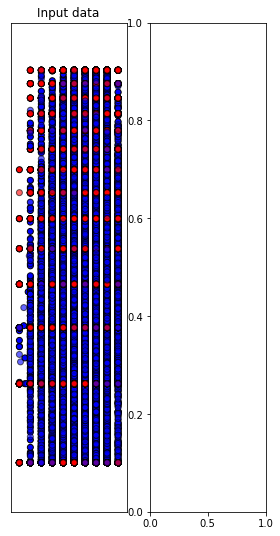

In [26]:
figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()